In [86]:
from src import utils_module
from src import preprocessing_module
import importlib
import pandas as pd

In [5]:
importlib.reload(utils_module)

df = utils_module.load_data(
                path_data="data/",
                name_csv_features="features.csv",
                name_csv_labels="labels.csv",
                delay=150,
                labeled_data_step=600000,
                )

In [11]:
importlib.reload(preprocessing_module)

data_arr = preprocessing_module.conver_datframe_to_numpy(
                        df,
                        columns=["X", "Y", "Z"],
                        debug=True,
                        )
                        
label_arr = preprocessing_module.conver_datframe_to_numpy(
                        df,
                        columns=["label"],
                        debug=True,
                        )

The columns are  (600000, 3)
The columns are  (600000, 1)


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

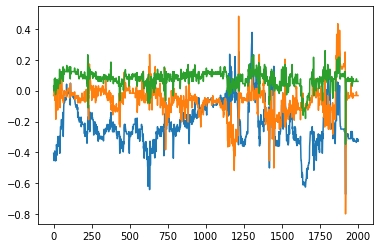

In [41]:
from src import preprocessing_module
import importlib
import matplotlib.pyplot as plt

importlib.reload(preprocessing_module)
detrend = preprocessing_module.detrend_signal(  signal = data_arr,
                                                type_detrend = "LINEAR"
                                                )

start = 5000
end = 7000
plt.plot(detrend[start:end])
plt.plot

[]

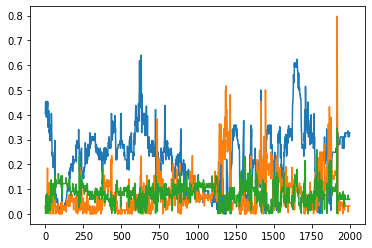

In [55]:
from src import preprocessing_module
import importlib

# reload the module
importlib.reload(preprocessing_module)
absolute_value = preprocessing_module.absolute_value(detrend)

start = 5000
end = 7000
plt.plot(absolute_value[start:end])
plt.plot()                                   

In [57]:
absolute_value.shape

(600000, 3)

In [77]:
data_eng[:3].shape

(3, 600000)

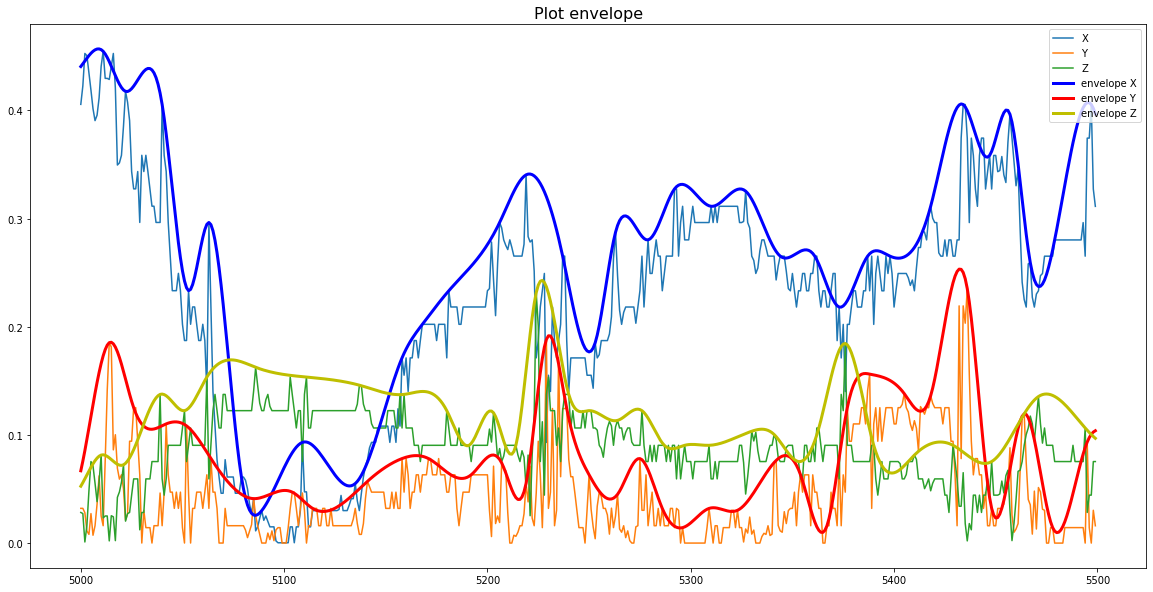

In [96]:
from src import preprocessing_module
import importlib  
import numpy as np  
import matplotlib.pyplot as plt

# Parameter interpolation ----------------------------------------------
interpolation = 10

importlib.reload(preprocessing_module)
data_eng = preprocessing_module.envelope(
                                    data = absolute_value,
                                    distance=interpolation
                                    )
# data_eng[1].shape

a = preprocessing_module.envelope_aux(absolute_value, interpolation)
x = np.arange(len(data_arr))

# Visualization interpolation  ----------------------------------------------
graph = True
start = 5000
end = 5500
if graph:
    # plot a
    plt.figure(figsize=(20,10))
    plt.title('Plot envelope',fontsize=16)
    plt.plot(x[start:end], absolute_value[start:end], label='envelope')
    plt.plot(x[start:end], a[0][start:end],color='b',linewidth=3)   
    plt.plot(x[start:end], a[1][start:end],color='r',linewidth=3)
    plt.plot(x[start:end], a[2][start:end],color='y',linewidth=3)
    # plt.plot(x[start:end], label_arr[start:end],color='black',linewidth=3)
    # legend column 1 is X, column 2 is Y, column 3 is Z
    plt.legend(['X', 'Y', 'Z','envelope X', 'envelope Y', 'envelope Z', 'label'], loc='upper right')
    plt.show()

In [97]:
from src import utils_module
import importlib

# reload the module
importlib.reload(utils_module)
# Data engineering ----------------------------------------------
names_new_columns = [f'x_env_{interpolation}',f'y_env_{interpolation}',f'z_env_{interpolation}']
new_df = utils_module.arr_to_dataframe(data_eng, df, names_new_columns)
new_df.head()

,x_env_10,y_env_10,z_env_10,X,Y,Z,label
0,0.000000,0.000000,0.000000,-0.062,-0.250,0.000,0
1,0.022441,0.034366,0.027448,-0.062,-0.203,-0.031,0
2,0.041952,0.063974,0.051826,-0.047,-0.219,0.047,0
3,0.058749,0.089204,0.073448,-0.078,-0.188,-0.016,0
4,0.073050,0.110437,0.092623,-0.078,-0.172,-0.031,0


In [98]:
# optional
new_df.to_csv(f'data/features_eng_{interpolation}.csv', index=False)

In [107]:
# red features_eng_*.csv
df_25 = pd.read_csv('data/features_eng_25.csv')
df_50 = pd.read_csv('data/features_eng_50.csv')
df_10 = pd.read_csv('data/features_eng_10.csv')

# df_50.head()
drop_columns = ['X', 'Y', 'Z', 'label']
df_10.drop(drop_columns, axis=1, inplace=True)
df_25.drop(drop_columns, axis=1, inplace=True)
df_50.drop(drop_columns, axis=1, inplace=True)

concat_df = pd.concat([df_10, df_25, df_50, df], axis=1)

concat_df_columns = concat_df.columns[:-1]

In [126]:
# concat_df.head()

In [125]:
# concat_df[concat_df_columns]

In [135]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, Normalizer, QuantileTransformer, PowerTransformer

scaler = Normalizer()

In [148]:
from src import preprocessing_module
# from sklearn.preprocessing import StandardScaler, MinMaxScaler
import importlib
import seaborn as sns
import warnings


# reload the module
importlib.reload(preprocessing_module)
# Norm data ----------------------------------------------
# column_scale = ["x_env", "y_env", "z_env", 'X', 'Y', 'Z']
columns_scale = ['x_env_10', 'y_env_10', 'z_env_10', 'x_env_25', 'y_env_25', 'z_env_25',
       'x_env_50', 'y_env_50', 'z_env_50', 'X', 'Y', 'Z']
columns_labels = ["label"]
df_sc = preprocessing_module.normalize_data( concat_df,
                        columns_scale=columns_scale, 
                        columns_no_scale=columns_labels, 
                        is_dataframe=True, 
                        type_normalization="MinMaxScaler"
                        )
# df_sc.head()

graph = False
if graph:
    print(df_sc["label"].value_counts())
    CLASS_NORMAL = 0
    class_names = ['Normal event','Reproductive event','Interest event']

    ax = sns.countplot(df_sc.label);
    ax.set_xticklabels(class_names); 
    # use percentage instead of count
    total = len(df_sc.label)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() - 0.5
        y = p.get_y() + p.get_height() 
        ax.annotate(percentage, (x, y))
        # ignore Future warnings
        warnings.simplefilter(action='ignore', category=FutureWarning)


In [149]:
df_sc.head()

,x_env_10,y_env_10,z_env_10,x_env_25,y_env_25,z_env_25,x_env_50,y_env_50,z_env_50,X,Y,Z,label
0,0.184777,0.215824,0.243863,0.118924,0.151711,0.219126,0.133975,0.119918,0.202708,0.502462,0.463158,0.757938,0
1,0.194367,0.227967,0.250263,0.127726,0.155433,0.222328,0.136926,0.131656,0.214121,0.502462,0.476177,0.750064,0
2,0.202703,0.238429,0.255948,0.136010,0.159410,0.225793,0.139922,0.143019,0.225162,0.506806,0.471745,0.769876,0
3,0.209881,0.247344,0.260990,0.143795,0.163627,0.229507,0.142961,0.154011,0.235835,0.497828,0.480332,0.753874,0
4,0.215992,0.254847,0.265461,0.151103,0.168070,0.233458,0.146040,0.164638,0.246144,0.497828,0.484765,0.750064,0


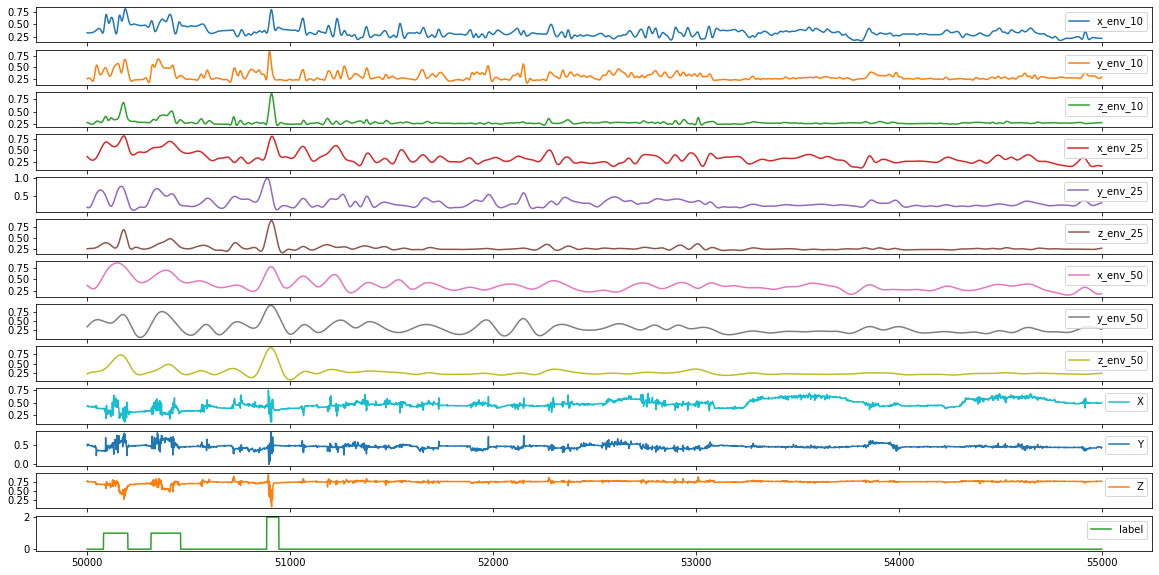

In [153]:
start = 50000
end = 55000
graph_size = (20,10)
df_sc[start:end].plot(subplots=True, figsize=graph_size)
plt.show()

In [165]:
import pandas as pd
from src import preprocessing_module
import importlib

# reload the module
importlib.reload(preprocessing_module)

df_sc.shape

# Data processing -------------------------------------------

interpolation = 20
arr_0, arr_1, arr_2, min_class = preprocessing_module.split_windows(
                                                        df_sc, 
                                                        width_windows = 20, 
                                                        stride_windows =20, 
                                                        debug=False
                                                        )



c:\Users\crist\Documents\Biology\QLA002 Panchito\V2\src\preprocessing_module.py:285: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # this part take a list of dataframes and transform a label column to columns of max in this windows


In [166]:
from src import utils_module
import importlib

# reload the module
importlib.reload(utils_module)
# # generate labels data ----------------------------------------------
y_train_0, y_train_1, y_train_2 = utils_module.create_labels(min_class, debug=False)

In [169]:
from src import prosecution_module
import importlib

# reload the module
importlib.reload(prosecution_module)


# # split data --------------------------------------------------------
X_train, X_test, y_train, y_test = prosecution_module.split_data(
                        (arr_0, arr_1, arr_2), 
                        (y_train_0, y_train_1, y_train_2), 
                        debug=False
                        )


In [22]:
from src import deep_learning_module
import importlib

# reload the module
importlib.reload(deep_learning_module)

# # reshape data --------------------------------------------------------
num_classes = 3 #cantidad de clases 
input_shape_dataset = (X_train[1], X_train[2], 1) # Es necesario agregar el 1 para que el modelo sepa que es una imagen en escala de grises

print(f"x_train shape: {X_train.shape} - y_train shape: {y_train.shape}")
print(f"x_test shape: {X_test.shape} - y_test shape: {y_test.shape}")

X_train, X_test = deep_learning_module.reshape_data_cnn(X_train, X_test, debug=False)

print(f"x_train reshape: {X_train.shape} - y_train reshape: {y_train.shape}")

x_train shape: (549, 20, 6) - y_train shape: (549,)
x_test shape: (138, 20, 6) - y_test shape: (138,)
x_train reshape: (549, 20, 6, 1) - y_train reshape: (549,)


In [23]:
input_shape_dataset = (X_train.shape[1], X_train.shape[2], 1)
num_classes = 3

In [24]:
# run the experiment with mlflow like a function ----------------------------------------------
from tensorflow.keras.optimizers import Adam
from src import deep_learning_module
import importlib
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
from sklearn.metrics import roc_auc_score
import mlflow
import datetime


importlib.reload(deep_learning_module)

def run_experiment_cnn_t(X_train, y_train, X_test, y_test, epochs=10, batch_size=32, debug=False, 
        optimizer = Adam, learning_rate = 0.005, metrics = ['accuracy'], loss = 'sparse_categorical_crossentropy'):
    with mlflow.start_run() as run:

        model = deep_learning_module.create_model_cnn_basic(input_shape_dataset, num_classes, debug=False)

        mlflow.log_param("input_shape_dataset", input_shape_dataset)
        mlflow.log_param("num_classes", num_classes)
        mlflow.log_param("num_layers_conv", 1)
        mlflow.log_param("num_layers_dense", 1)

        # create the compile
        model.compile(  optimizer=Adam(learning_rate=learning_rate),
                         loss=loss, 
                         metrics=metrics)


        mlflow.log_param("optimizer", optimizer)
        mlflow.log_param("learning_rate", learning_rate)
        mlflow.log_param("metrics", metrics)
        mlflow.log_param("loss", loss)

        # log interpolation
        mlflow.log_param("interpolation", interpolation)

        # fit model
        history = model.fit(X_train, y_train,
                         epochs=epochs,
                         batch_size=batch_size,
                         validation_data=(X_test, y_test),
                         verbose=0)
        # log params
        mlflow.log_param("epochs", epochs)
        mlflow.log_param("batch_size", batch_size)
        # fit model
        history = model.fit(    X_train, 
                                y_train,    
                                epochs=epochs, 
                                batch_size=batch_size, 
                                validation_data=(X_test, y_test),
                                verbose=0)
        
        # log model
        mlflow.tensorflow.log_model(model, "model")

        # log metrics
        mlflow.log_metric("loss", history.history['loss'][-1])
        mlflow.log_metric("accuracy", history.history['accuracy'][-1])
        mlflow.log_metric("val_loss", history.history['val_loss'][-1])
        mlflow.log_metric("val_accuracy", history.history['val_accuracy'][-1])

        # log artifacts TODO

        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title('Model accuracy')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Test'], loc='upper left')
        # grid on
        plt.grid()        
        	
        plt.savefig('Accuracy.png', dpi=300)  # no se exactamento donde lo guarda por lo que no puedo guardar en articafts
        mlflow.log_artifact('Accuracy.png') # Esta linea no entrega falso

        # make a prediction
        y_pred = model.predict(X_test)
        y_pred = np.argmax(y_pred, axis=1)

        # save y_pred to csv
        # np.savetxt('y_pred.csv', y_pred, delimiter=',')
        # mlflow.log_artifact('y_pred.csv')

        # log confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        fig, ax = plt.subplots(figsize=(10,10))
        sns.heatmap(cm, annot=True, fmt="d");
        plt.figure(figsize=(10,10))
        plt.title("Confusion matrix")
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.savefig('confusion_matrix.png', dpi=300)
        mlflow.log_artifact('confusion_matrix.png')

        # save the model trained, with name model "interpotation value" .h5, and timestamp
        timestamp = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
        model.save("model"+str(interpolation)+timestamp+".h5")
        # model.save('model.h5')

        # curve roc TODO



        if debug:
            print("run_id: {}".format(run.info.run_id))
            print("artifacts_uri: {}".format(run.info.artifact_uri))
    return history

5/5 [==============================] - 0s 2ms/step


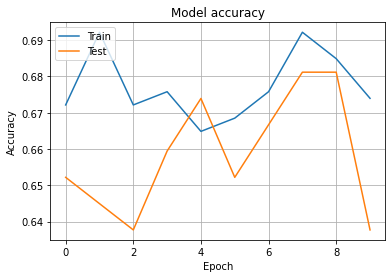

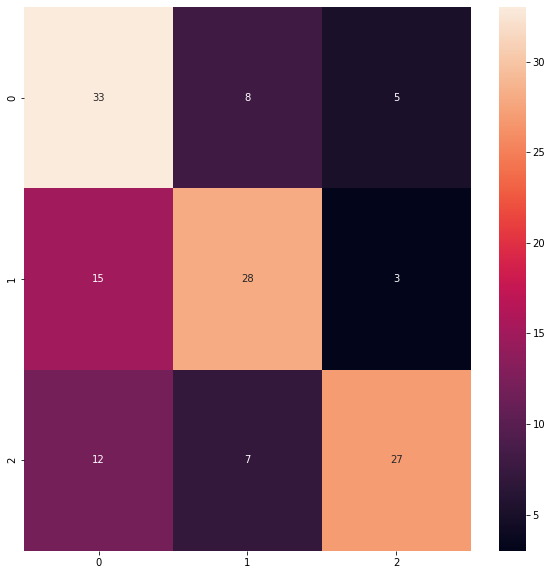

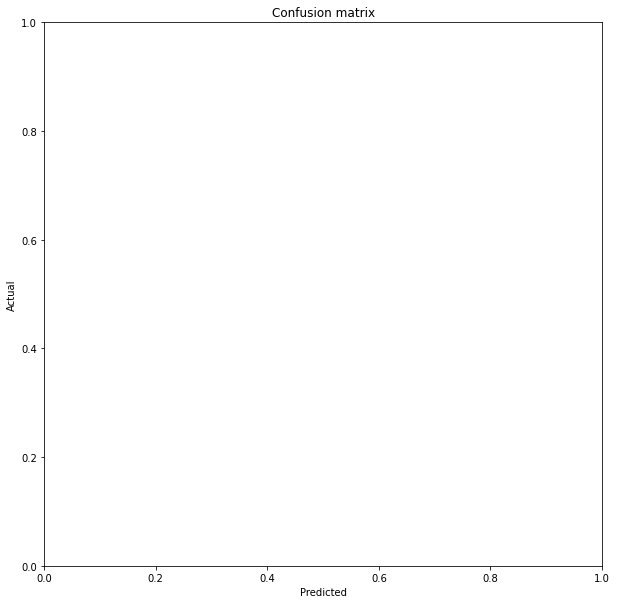

In [38]:
run_experiment_cnn_t(X_train, y_train, X_test, y_test, epochs=10, batch_size=32, debug=False,)

In [30]:
input_shape_dataset

(20, 6, 1)

In [34]:

num_classes

3

5/5 [==============================] - 0s 2ms/step


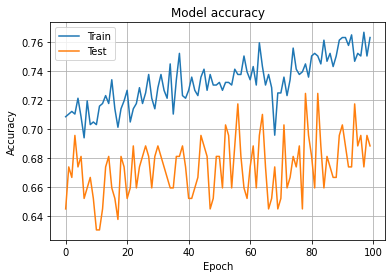

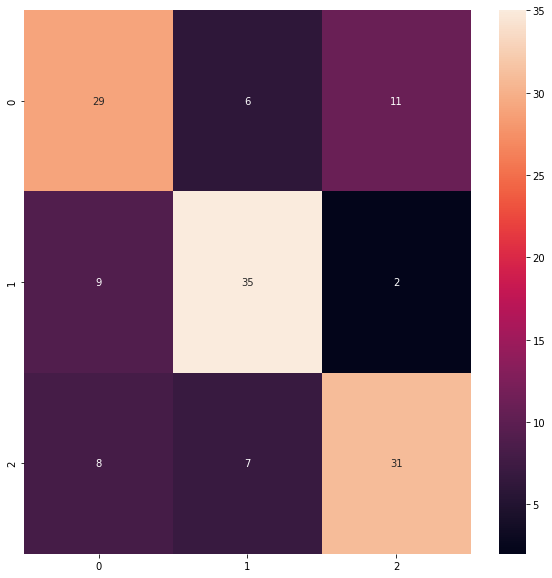

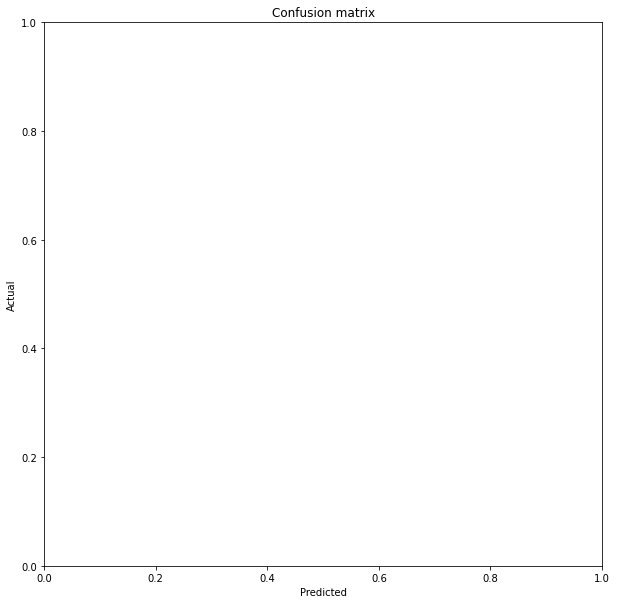

In [39]:
from src import deep_learning_module
import importlib

importlib.reload(deep_learning_module)
history = deep_learning_module.run_experiment_cnn(  input_shape_dataset,
                                                    X_train, 
                                                    y_train, 
                                                    X_test, 
                                                    y_test, 
                                                    epochs=100, 
                                                    batch_size=256, 
                                                    debug=False,
                                                    optimizer = Adam,
                                                    learning_rate=0.001,
                                                    metrics = ['accuracy'],
                                                    loss = 'sparse_categorical_crossentropy')
